<a href="https://colab.research.google.com/github/Maisha2023/MODELS/blob/main/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi


/bin/bash: nvidia-smi: command not found


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import cv2
import os
import pandas as pd


In [4]:

import pandas as pd
train_dir = '/content/drive/MyDrive/unetat'
df = pd.read_csv('/content/sample_data/data.csv')

In [5]:
df.drop(df[(df['id'] == 7144)].index, inplace=True)
df.drop(df[(df['id'] == 7144)].index, inplace=True)


In [6]:
df = df.groupby(['boneage']).apply(lambda x: x.sample(15, replace = True)
                                                      ).reset_index(drop = True)

In [7]:
df['boneage'] = df['boneage'].astype('int')

In [8]:
df

,Unnamed: 0,id,boneage,gender
0,504,5574,0,1
1,504,5574,0,1
2,504,5574,0,1
3,504,5574,0,1
4,504,5574,0,1
...,...,...,...,...
15715,1225,5198,228,0
15716,1225,5198,228,0
15717,1225,5198,228,0
15718,1225,5198,228,0


In [9]:
import os
age_df = df
age_df['path'] = age_df['id'].map(lambda x: os.path.join(train_dir,
                                                         '{}.jpg'.format(x)))
#age_df['exists'] = age_df['path'].map(os.path.exists)

In [10]:
age1=age_df

In [14]:
age1

,Unnamed: 0,id,boneage,gender,path
0,504,5574,0,1,/content/drive/MyDrive/unetat/5574.jpg
1,504,5574,0,1,/content/drive/MyDrive/unetat/5574.jpg
2,504,5574,0,1,/content/drive/MyDrive/unetat/5574.jpg
3,504,5574,0,1,/content/drive/MyDrive/unetat/5574.jpg
4,504,5574,0,1,/content/drive/MyDrive/unetat/5574.jpg
...,...,...,...,...,...
15715,1225,5198,228,0,/content/drive/MyDrive/unetat/5198.jpg
15716,1225,5198,228,0,/content/drive/MyDrive/unetat/5198.jpg
15717,1225,5198,228,0,/content/drive/MyDrive/unetat/5198.jpg
15718,1225,5198,228,0,/content/drive/MyDrive/unetat/5198.jpg


In [11]:
ag=age1.boneage.unique()
ag.shape

(225,)

In [12]:
age1.drop(df[(age1['gender'] == 0)].index, inplace=True)

In [13]:
age1

,Unnamed: 0,id,boneage,gender,path
0,504,5574,0,1,/content/drive/MyDrive/unetat/5574.jpg
1,504,5574,0,1,/content/drive/MyDrive/unetat/5574.jpg
2,504,5574,0,1,/content/drive/MyDrive/unetat/5574.jpg
3,504,5574,0,1,/content/drive/MyDrive/unetat/5574.jpg
4,504,5574,0,1,/content/drive/MyDrive/unetat/5574.jpg
...,...,...,...,...,...
15685,3,5084,227,1,/content/drive/MyDrive/unetat/5084.jpg
15686,3,5084,227,1,/content/drive/MyDrive/unetat/5084.jpg
15687,3,5084,227,1,/content/drive/MyDrive/unetat/5084.jpg
15688,3,5084,227,1,/content/drive/MyDrive/unetat/5084.jpg


In [14]:
ag=age1.boneage.unique()
ag.shape

(214,)

In [15]:
train1_df = age1.groupby(['boneage']).apply(lambda x: x.sample(15, replace = True)
                                                      ).reset_index(drop = True)

In [16]:
train1_df

,Unnamed: 0,id,boneage,gender,path
0,347,5604,0,1,/content/drive/MyDrive/unetat/5604.jpg
1,504,5574,0,1,/content/drive/MyDrive/unetat/5574.jpg
2,347,5604,0,1,/content/drive/MyDrive/unetat/5604.jpg
3,504,5574,0,1,/content/drive/MyDrive/unetat/5574.jpg
4,347,5604,0,1,/content/drive/MyDrive/unetat/5604.jpg
...,...,...,...,...,...
3205,3,5084,227,1,/content/drive/MyDrive/unetat/5084.jpg
3206,3,5084,227,1,/content/drive/MyDrive/unetat/5084.jpg
3207,3,5084,227,1,/content/drive/MyDrive/unetat/5084.jpg
3208,3,5084,227,1,/content/drive/MyDrive/unetat/5084.jpg


In [17]:
from sklearn.model_selection import train_test_split
train_test1, valid1 = train_test_split(train1_df,
                                   test_size = 0.2,
                                   random_state = 2018,
                                   stratify = train1_df['boneage'])
#print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train1, test1 = train_test_split(train_test1,
                                   test_size = 0.3,
                                   random_state = 2018,
                                   stratify = train_test1['boneage'])
print('train', train1.shape[0], 'validation', valid1.shape[0],test1.shape[0])

train 1797 validation 642 771


In [18]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (256,256)
core_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [19]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir,
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.filepaths.extend(df_gen.filenames)
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = ''
    gen=np.ones(df_gen.samples)
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    #print(df_gen.samples)
    #yield (df_gen,gen)
    return df_gen

In [43]:
train1_gen = flow_from_dataframe( core_idg, train1,
                             path_col = 'path',
                            y_col = 'boneage',
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1789)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1797 images


In [44]:
valid1_gen = flow_from_dataframe(core_idg, valid1,
                             path_col = 'path',
                            y_col = 'boneage',
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 639)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 642 images


In [20]:

testcore_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [21]:
test1_gen = flow_from_dataframe(testcore_idg,
                              test1,
                             path_col = 'path',
                            y_col = 'boneage',
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 767)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 771 images


In [47]:
train1_X, train1_Y = next(train1_gen)

In [48]:
train1_X.shape

(1789, 256, 256, 3)

In [49]:
valid1_X, valid1_Y = next(valid1_gen)

In [50]:

valid1_X.shape

(639, 256, 256, 3)

In [22]:
test1_X, test1_Y = next(test1_gen)

In [27]:
test1_X.shape

(767, 256, 256, 3)

In [23]:

import pandas as pd
train_dir = '/content/drive/MyDrive/unetat'
df = pd.read_csv('/content/sample_data/data.csv')

In [24]:
df.drop(df[(df['id'] == 7144)].index, inplace=True)



In [25]:
df = df.groupby(['boneage']).apply(lambda x: x.sample(15, replace = True)
                                                      ).reset_index(drop = True)

In [26]:

df['boneage'] = df['boneage'].astype('int')

In [27]:
ag=df.boneage.unique()
ag.shape

(225,)

In [28]:
import os
age_df = df
age_df['path'] = age_df['id'].map(lambda x: os.path.join(train_dir,
                                                         '{}.jpg'.format(x)))
#age_df['exists'] = age_df['path'].map(os.path.exists)

In [29]:
age0=age_df

In [30]:
age0.drop(df[(age0['gender'] == 1)].index, inplace=True)

In [31]:
age0

,Unnamed: 0,id,boneage,gender,path
30,1036,4706,2,0,/content/drive/MyDrive/unetat/4706.jpg
31,1036,4706,2,0,/content/drive/MyDrive/unetat/4706.jpg
32,1036,4706,2,0,/content/drive/MyDrive/unetat/4706.jpg
33,1036,4706,2,0,/content/drive/MyDrive/unetat/4706.jpg
34,1036,4706,2,0,/content/drive/MyDrive/unetat/4706.jpg
...,...,...,...,...,...
15715,1225,5198,228,0,/content/drive/MyDrive/unetat/5198.jpg
15716,1225,5198,228,0,/content/drive/MyDrive/unetat/5198.jpg
15717,1225,5198,228,0,/content/drive/MyDrive/unetat/5198.jpg
15718,1225,5198,228,0,/content/drive/MyDrive/unetat/5198.jpg


In [32]:
ag=age0.boneage.unique()
ag.shape

(211,)

In [33]:
train0_df = age0.groupby(['boneage']).apply(lambda x: x.sample(15, replace = True)
                                                      ).reset_index(drop = True)

In [34]:
train0_df

,Unnamed: 0,id,boneage,gender,path
0,1036,4706,2,0,/content/drive/MyDrive/unetat/4706.jpg
1,1036,4706,2,0,/content/drive/MyDrive/unetat/4706.jpg
2,1036,4706,2,0,/content/drive/MyDrive/unetat/4706.jpg
3,1036,4706,2,0,/content/drive/MyDrive/unetat/4706.jpg
4,1036,4706,2,0,/content/drive/MyDrive/unetat/4706.jpg
...,...,...,...,...,...
3160,1225,5198,228,0,/content/drive/MyDrive/unetat/5198.jpg
3161,1225,5198,228,0,/content/drive/MyDrive/unetat/5198.jpg
3162,1225,5198,228,0,/content/drive/MyDrive/unetat/5198.jpg
3163,1225,5198,228,0,/content/drive/MyDrive/unetat/5198.jpg


In [35]:
from sklearn.model_selection import train_test_split
train_test0, valid0 = train_test_split(train0_df,
                                   test_size = 0.2,
                                   random_state = 2018,
                                   stratify = train0_df['boneage'])
#print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train0, test0 = train_test_split(train_test0,
                                   test_size = 0.3,
                                   random_state = 2018,
                                   stratify = train_test0['boneage'])
print('train', train0.shape[0], 'validation', valid0.shape[0],test0.shape[0])

train 1772 validation 633 760


In [36]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (256,256)
core_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [37]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir,
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.filepaths.extend(df_gen.filenames)
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = ''
    gen=np.ones(df_gen.samples)
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    #print(df_gen.samples)
    #yield (df_gen,gen)
    return df_gen

In [43]:
train0_gen = flow_from_dataframe( core_idg, train0,
                             path_col = 'path',
                            y_col = 'boneage',
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1772)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1772 images


In [69]:
valid0_gen = flow_from_dataframe(core_idg, valid0,
                             path_col = 'path',
                            y_col = 'boneage',
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 633)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 633 images


In [44]:


testcore_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [38]:
test0_gen = flow_from_dataframe(testcore_idg,
                              test0,
                             path_col = 'path',
                            y_col = 'boneage',
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 760)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 760 images


In [72]:
train0_X, train0_Y = next(train0_gen)

In [73]:
train0_X.shape

(1772, 256, 256, 3)

In [74]:
train_x=[]
train_y=[]
train_gen=[]
i=0
for k in range(354):
  for j in range(5):
    train_x.append(train1_X[i])
    train_y.append(train1_Y[i])
    train_gen.append(1)
    train_x.append(train0_X[i])
    train_y.append(train0_Y[i])
    train_gen.append(0)
    i=i+1
print(i)
i=1770
for k in range(19):
    train_x.append(train1_X[i])
    train_y.append(train1_Y[i])
    train_gen.append(1)
    i=i+1
i=1770
del train1_Y
del train1_X

for k in range(2):
    train_x.append(train0_X[i])
    train_y.append(train0_Y[i])
    train_gen.append(0)
    i=i+1
del train0_Y
del train0_X


1770


In [75]:
train_x=np.asarray(train_x)
train_x=train_x/255
train_y=np.asarray(train_y)
train_gen=np.asarray(train_gen)

In [76]:
valid0_X, valid0_Y = next(valid0_gen)

In [77]:

valid0_X.shape

(633, 256, 256, 3)

In [78]:

valid_x=[]
valid_y=[]
valid_gen=[]
i=0
for k in range(211):
  for j in range(3):
    valid_x.append(valid1_X[i])
    valid_y.append(valid1_Y[i])
    valid_gen.append(1)
    valid_x.append(valid0_X[i])
    valid_y.append(valid0_Y[i])
    valid_gen.append(0)
    i=i+1
print(i)
i=633
for k in range(6):
    valid_x.append(valid1_X[i])
    valid_y.append(valid1_Y[i])
    valid_gen.append(1)
    i=i+1
del valid1_Y
del valid1_X
del valid0_Y
del valid0_X

633


In [79]:

valid_x=np.asarray(valid_x)
valid_x=valid_x/255
valid_y=np.asarray(valid_y)
valid_gen=np.asarray(valid_gen)

In [39]:
test0_X, test0_Y = next(test0_gen)

In [40]:
test0_X.shape

(760, 256, 256, 3)

In [41]:
train_x.shape

NameError: ignored

In [42]:
test_x=[]
test_y=[]
test_gen=[]
i=0
for k in range(152):
  for j in range(5):
    test_x.append(test1_X[i])
    test_y.append(test1_Y[i])
    test_gen.append(1)
    test_x.append(test0_X[i])
    test_y.append(test0_Y[i])
    test_gen.append(0)
    i=i+1
print(i)
i=760
for k in range(7):
    test_x.append(test1_X[i])
    test_y.append(test1_Y[i])
    test_gen.append(1)
    i=i+1
del test1_Y
del test1_X

del test0_Y
del test0_X

760


In [43]:
test_x=np.asarray(test_x)
test_x=test_x/255
test_y=np.asarray(test_y)
test_gen=np.asarray(test_gen)

In [44]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.preprocessing import image
from tensorflow.keras import regularizers
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Reshape, Lambda,Conv2D,BatchNormalization,Concatenate, Dropout, GlobalAveragePooling2D, Multiply,Add
import tensorflow as tf
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras
#from func_utils import *
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="2"
#os.environ['OMP_NUM_THREADS']='6'
batch_size = 4
epochs = 30

In [45]:
def SmallObjectAttention(input_tensor):
    # Calculate channel attention weights
    attention = GlobalAveragePooling2D()(input_tensor)
    attention = Dense(units=input_tensor.shape[-1] // 4, activation='relu')(attention)
    attention = Dense(units=input_tensor.shape[-1], activation='sigmoid')(attention)
    attention = Reshape((1, 1, -1))(attention)

    # Multiply the attention weights with the input tensor
    attention = Multiply()([input_tensor, attention])

    # Add the attention weights to the input tensor
    output_tensor = Add()([input_tensor, attention])

    return output_tensor

In [46]:
def LargeObjectAttention(input_tensor, reduction_ratio=16):
    channels = input_tensor.shape[-1]

    # Squeeze: Global average pooling across spatial dimensions
    squeeze = GlobalAveragePooling2D()(input_tensor)

    # Excitation: Two fully connected layers with sigmoid activation
    excitation = Dense(units=channels // reduction_ratio, activation='relu')(squeeze)
    excitation = Dense(units=channels, activation='sigmoid')(excitation)

    # Reshape excitation weights to match input tensor shape
    excitation = Reshape((1, 1, channels))(excitation)

    # Scale the input tensor by the excitation weights
    scaled_tensor = Multiply()([input_tensor, excitation])

    # Add the scaled tensor to the input tensor
    output_tensor = Add()([input_tensor, scaled_tensor])

    return output_tensor


In [47]:
def channel_attention(input_feature):
  kernel_initializer = tf.keras.initializers.variance_scaling()
  bias_initializer = tf.constant_initializer(value=0.0)
  channel = input_feature.get_shape()[-1]
  ratio=16
  avg_pool = tf.reduce_mean(input_feature, axis=[1,2], keepdims=True)
  assert avg_pool.get_shape()[1:] == (1,1,channel)
  avg_pool =Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu,
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer) (avg_pool)
  assert avg_pool.get_shape()[1:] == (1,1,channel//ratio)
  avg_pool = Dense(
                                 units=channel,
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer)  (avg_pool)
  assert avg_pool.get_shape()[1:] == (1,1,channel)

  max_pool = tf.reduce_max(input_feature, axis=[1,2], keepdims=True)
  assert max_pool.get_shape()[1:] == (1,1,channel)
  max_pool = Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu) (max_pool)
  assert max_pool.get_shape()[1:] == (1,1,channel//ratio)
  max_pool = Dense(
                                 units=channel)  (max_pool)
  assert max_pool.get_shape()[1:] == (1,1,channel)

  scale = tf.keras.activations.sigmoid(avg_pool + max_pool)
  return input_feature * scale

In [48]:
def spatial_attention(input_feature):
  kernel_size = 7
  kernel_initializer = tf.keras.initializers.variance_scaling()

  avg_pool = tf.reduce_mean(input_feature, axis=[3], keepdims=True)
  assert avg_pool.get_shape()[-1] == 1
  max_pool = tf.reduce_max(input_feature, axis=[3], keepdims=True)
  assert max_pool.get_shape()[-1] == 1
  concat = tf.concat([avg_pool,max_pool], 3)
  assert concat.get_shape()[-1] == 2

  concat = Conv2D(
                              filters=1,
                              kernel_size=[kernel_size,kernel_size],
                              strides=[1,1],
                              padding="same",
                              activation=None,
                              kernel_initializer=kernel_initializer,
                              use_bias=False)(concat)
  assert concat.get_shape()[-1] == 1
  concat = tf.keras.activations.sigmoid(concat)

  return input_feature * concat

In [49]:
def modelsb():
  base_model = Xception(weights='imagenet', include_top=False)

  input = Input(shape=(256,256,3),name='input1')
  input_gender = Input(shape=(1,),dtype='float32',name='input2')
  output = base_model(input)
  gender_embedding=Dense(32)(input_gender)
  x = output
  #y = output_tensor2
  small=SmallObjectAttention(x)
  big=LargeObjectAttention(x)
  x1 = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
  x2=BatchNormalization()(x1)
  x3= Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x2)
  x4=BatchNormalization()(x3)
  x5 = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x4)
  x6=BatchNormalization()(x5)
  x7= channel_attention(x6)
  x8=spatial_attention(x7)
  x9= Concatenate()([small,big,x8])
  # Add the final layers for classification/regression
  x10= Dropout(0.5)(x9)
  x11 = GlobalAveragePooling2D()(x10)
  #y = GlobalAveragePooling2D()(y)
  x12 = Dense(512, activation='relu')(x11)
  x13 = Dense(256, activation='relu')(x12)
  f = keras.layers.Concatenate(axis=1)([x13,gender_embedding])
  print (K.int_shape(f))
  #x = Dense(256, activation='relu')(x)
  predictions = Dense(1)(f)
  model = Model(inputs=[input,input_gender], outputs=predictions)
  return model

In [50]:
model1=modelsb()
Adam=keras.optimizers.Adam(lr=0.0003,beta_1=0.9,beta_2=0.999)
# Compile the model
model1.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['mae'])


# Print the model summary
model1.summary()

(None, 288)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, None, None,   20861480    ['input1[0][0]']                 
                                2048)                                                             
                                                                                                  
 conv2d_4 (Conv2D)              (None, 8, 8, 256)    4718848     ['xception[0][0]']               
                                                                                  

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


                                                                                                  
 batch_normalization_5 (BatchNo  (None, 8, 8, 256)   1024        ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 conv2d_6 (Conv2D)              (None, 8, 8, 256)    590080      ['batch_normalization_5[0][0]']  
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 8, 8, 256)   1024        ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 tf.math.reduce_mean (TFOpLambd  (None, 1, 1, 256)   0           ['batch_normalization_6[0][0]']  
 a)       

In [105]:

from keras.preprocessing.image import ImageDataGenerator
DataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)
def Generator(x_train,gender_train,y_train,batch_size):
    loopcount = len(y_train)//batch_size
    i=0
    while (True):
        if i>loopcount:
            i=0
        # i=np.random.randint(0,loopcount)
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:,:]
        x_train_batch = DataAugment(x_train_batch)
        gender_train_batch = gender_train[i*batch_size:(i+1)*batch_size]
        y_train_batch = y_train[i*batch_size:(i+1)*batch_size]
        inputs = [x_train_batch,gender_train_batch]
        target = y_train_batch
        yield (inputs ,target)
        i = i+1
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="/content/drive/MyDrive/{}_.h5".format('MM1_1')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, reduceLROnPlat]
history = model1.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=16),steps_per_epoch=np.ceil(len(train_y)/16),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y),callbacks=callbacks_list)
#history = model.fit_generator(Generator(x_train,gender_train,y_train,batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid))
#history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=5,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
#score = model.evaluate([test_x,test_gen], test_y, batch_size=4)

# MAE:11.40

<ipython-input-105-932444483018>:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=16),steps_per_epoch=np.ceil(len(train_y)/16),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y),callbacks=callbacks_list)


Epoch 1/100
223/223 [==============================] - ETA: 0s - loss: 27.4391 - mae: 27.4391
Epoch 1: val_loss improved from inf to 20.27801, saving model to /content/drive/MyDrive/MM1_1_.h5
223/223 [==============================] - 138s 546ms/step - loss: 27.4391 - mae: 27.4391 - val_loss: 20.2780 - val_mae: 20.2780 - lr: 3.0000e-04
Epoch 2/100
223/223 [==============================] - ETA: 0s - loss: 17.9328 - mae: 17.9328
Epoch 2: val_loss did not improve from 20.27801
223/223 [==============================] - 96s 432ms/step - loss: 17.9328 - mae: 17.9328 - val_loss: 21.5496 - val_mae: 21.5496 - lr: 3.0000e-04
Epoch 3/100
223/223 [==============================] - ETA: 0s - loss: 15.7449 - mae: 15.7449
Epoch 3: val_loss did not improve from 20.27801
223/223 [==============================] - 97s 436ms/step - loss: 15.7449 - mae: 15.7449 - val_loss: 23.0039 - val_mae: 23.0039 - lr: 3.0000e-04
Epoch 4/100
223/223 [==============================] - ETA: 0s - loss: 14.3486 - mae: 14

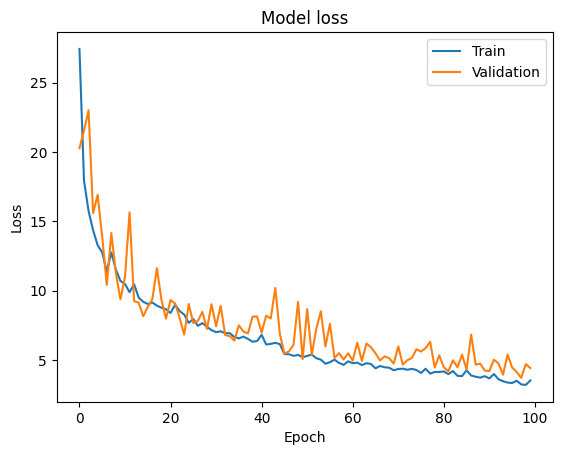

In [106]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [107]:
score = model.evaluate([test_x,test_gen], test_y, batch_size=64)

NameError: ignored

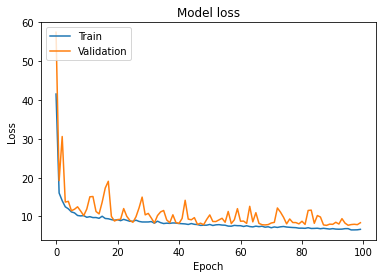

In [ ]:
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=5)
history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=5,verbose=1,validation_data=([valid_x,valid_gen],valid_y))

<ipython-input-66-52ad6d3ea97d>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=5,verbose=1,validation_data=([valid_x,valid_gen],valid_y))


Epoch 1/5
122/122 [==============================] - 113s 921ms/step - loss: 6.7474 - MAE: 6.7091 - val_loss: 8.0912 - val_MAE: 8.0726
Epoch 2/5
122/122 [==============================] - 110s 897ms/step - loss: 6.4942 - MAE: 6.4609 - val_loss: 8.3089 - val_MAE: 8.2899
Epoch 3/5
122/122 [==============================] - 111s 905ms/step - loss: 6.4983 - MAE: 6.4642 - val_loss: 8.4152 - val_MAE: 8.3739
Epoch 4/5
122/122 [==============================] - 112s 914ms/step - loss: 6.3918 - MAE: 6.3631 - val_loss: 7.9647 - val_MAE: 7.9406
Epoch 5/5
122/122 [==============================] - 112s 910ms/step - loss: 6.3538 - MAE: 6.3303 - val_loss: 7.8147 - val_MAE: 7.7986


In [51]:
model1.load_weights('/content/drive/MyDrive/MM1_1_.h5')

In [58]:
score = model1.evaluate([test_x,test_gen], test_y, batch_size=64)

24/24 [==============================] - 319s 13s/step - loss: 3.5899 - mae: 3.5899


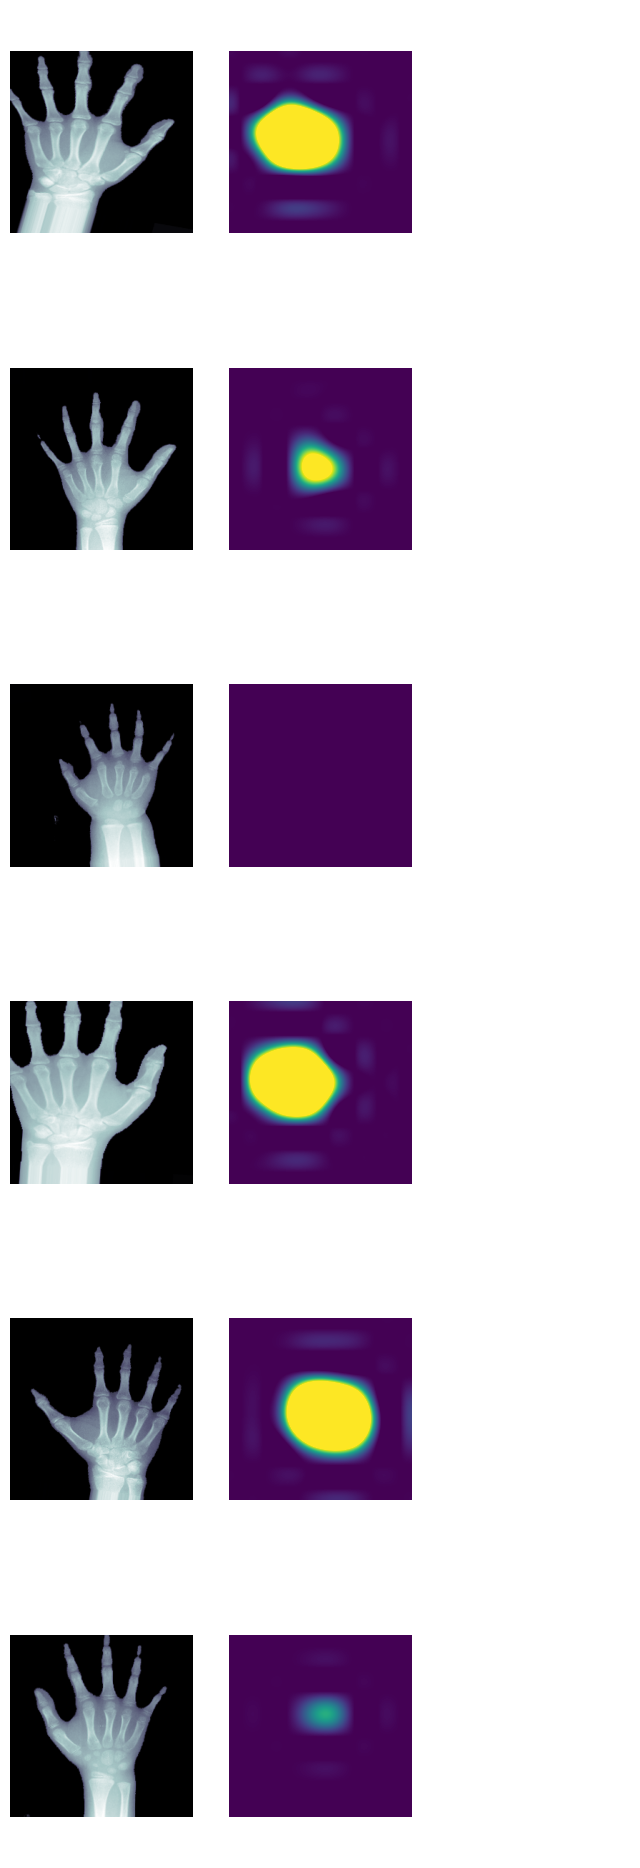

In [70]:
import keras.backend as K
rand_idx = np.random.choice(range(len(test_x)), size = 6)


# Pass some input data through the model to activate the layers
#model1.predict(test_X[0:1])
#attn_func = K.function(inputs = [bone_age_model.input, K.learning_phase()],
#          outputs = [attn_layer.output]
#          )
last_conv_layer_name='add_13'
#attn_func = tf.keras.models.Model( [model1.layers[0].input],[model1.layers[1].get_output_at(-1),model1.layers[-1].output])
attn_func = tf.keras.models.Model( [model1.inputs], [model1.get_layer(last_conv_layer_name).output, model1.output])
fig, m_axs = plt.subplots(len(rand_idx), 3, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for c_idx, (img_ax, attn_ax,imgg_ax) in zip(rand_idx, m_axs):
    cur_img = test_x[c_idx:(c_idx+1)]
    gen = test_gen[c_idx:(c_idx+1)]
    attn_img = attn_func([cur_img,gen])
    #imgg=save_and_display_gradcam(cur_img, attn_img, cam_path="cam.jpg", alpha=0.4)
    img_ax.imshow(cur_img[0,:,:,0], cmap = 'bone')
    #attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis',
                   #vmin = 0, vmax = 1,
                   #interpolation = 'lanczos')
    attn_ax.imshow(attn_img[0][0, :, :, 0], cmap='viridis', vmin=0, vmax=1, interpolation='lanczos')

    #attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'bone',
                  # vmin = 0, vmax = 2,
                   #interpolation = 'lanczos')
fig.savefig('attention_map.png', dpi = 300)

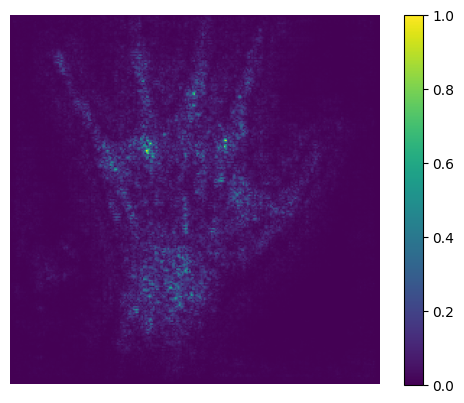

In [57]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Function to generate saliency map
def generate_saliency_map(model, image,gen):
    # Convert the image to a TensorFlow tensor
    image_tensor = tf.convert_to_tensor(image)
    gen_tensor = tf.convert_to_tensor(gen)
    # Create a gradient tape to track the operations on the input image
    with tf.GradientTape() as tape:
        # Watch the input image variable
        tape.watch(image_tensor)
        # Forward pass through the model
        predictions = model1([image_tensor,gen_tensor])

    # Get the gradients of the predicted output with respect to the input image
    gradients = tape.gradient(predictions, image_tensor)

    # Compute the absolute gradients along the channel axis
    gradients = tf.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)

    # Normalize the gradients to [0, 1]
    gradients = (gradients - tf.reduce_min(gradients)) / (tf.reduce_max(gradients) - tf.reduce_min(gradients))

    return gradients

# Set parameters
input_shape = (256, 256, 3)  # Input shape of the image



# Generate saliency map
saliency_map = generate_saliency_map(model1, test_x[5:6], test_gen[5:6])

# Visualize the saliency map
plt.imshow(saliency_map[0], cmap='viridis')
#cv2.imwrite('cam.jpg',saliency_map[0])
plt.axis('off')
plt.colorbar()
plt.show()
